## LDA-analysis
Here we import our LDA_model and initialize it using our dataset. 

In [15]:
# !python -m spacy download nb_core_news_md # Uncomment to download Norsk Bokmål language package.

In [16]:
from src.models.LDA import LDA, plot_topic_distribution
import pandas as pd

dataframe = pd.read_csv('../../dataset/nou_hearings.csv')
texts = dataframe.text.tolist()
lda = LDA(data=texts, no_below=15, no_above=0.5, language='/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/nb_core_news_md/nb_core_news_md-3.7.0')

### Estimate optimal number of topics

In [17]:
# lda.plot_coherence(topic_interval=(2, 25), passes=100, savefig='LDA_coherence')

### Build model and Print topics

In [18]:
model = lda.build_LDA_model(num_topics=8, passes=1000)
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.024*"norge" + 0.022*"norsk" + 0.020*"utslipp" + 0.017*"energi" + 0.013*"øke" + 0.012*"redusere" + 0.012*"fornybar" + 0.011*"industri" + 0.010*"produksjon" + 0.010*"kraft"')
(1, '0.019*"støtte" + 0.017*"kommune" + 0.016*"burde" + 0.013*"utvalg" + 0.013*"krav" + 0.012*"natur" + 0.010*"anbefaling" + 0.010*"bruk" + 0.009*"nasjonal" + 0.008*"prioritere"')
(2, '0.019*"norge" + 0.017*"skog" + 0.016*"tiltak" + 0.013*"dag" + 0.013*"utvalg" + 0.013*"effekt" + 0.012*"burde" + 0.012*"forhold" + 0.011*"eu" + 0.011*"rapport"')
(3, '0.016*"utslipp" + 0.013*"øke" + 0.012*"redusere" + 0.011*"norsk" + 0.010*"bærekraftig" + 0.010*"nasjonal" + 0.009*"bidra" + 0.008*"bruk" + 0.008*"måte" + 0.008*"norge"')
(4, '0.020*"natur" + 0.015*"klima" + 0.013*"stor" + 0.012*"grønn" + 0.011*"miljø" + 0.011*"derfor" + 0.010*"omstilling" + 0.010*"økonomisk" + 0.009*"norge" + 0.008*"behov"')
(5, '0.031*"omstilling" + 0.024*"utvalg" + 0.021*"klimapolitikk" + 0.015*"klimautvalget" + 0.014*"lavutslippssamfunn" + 0.013

### Calculate text-topic pairs

In [19]:
predictions = lda.predict_topics(model=model, relevancy=False)
dataframe['topic_predictions'] = predictions

dataframe.head(n=100)

,actor,text,date,actor_label,topic_predictions
0,Abelia,Abelia er foreningen for kunnskaps- og teknolo...,30.01.2024,Interessegruppe,"{'topic': 4, 'confidence': 0.63}"
1,Abelia,Innledningsvis vil vi takke for det grundige o...,30.01.2024,Interessegruppe,"{'topic': 5, 'confidence': 0.94}"
2,Abelia,Vi er enig med utvalget i at klimapolitikken m...,30.01.2024,Interessegruppe,"{'topic': 5, 'confidence': 0.95}"
3,Abelia,Over de siste åtte årene har Abelia målt norsk...,30.01.2024,Interessegruppe,"{'topic': 4, 'confidence': 0.45}"
4,Abelia,Vi vil gjerne oppfordre til at det blir satt s...,30.01.2024,Interessegruppe,"{'topic': 5, 'confidence': 0.79}"
...,...,...,...,...,...
95,Animalia AS,Bærekraftmål nr. 13 er å “handle umiddelbart f...,30.01.2024,Bedrift,"{'topic': 4, 'confidence': 0.55}"
96,Animalia AS,FAO avholdt sin 43. Generalkonferanse for mats...,30.01.2024,Bedrift,"{'topic': 3, 'confidence': 0.7}"
97,Animalia AS,Den første FAO initierte kongressen om bærekra...,30.01.2024,Bedrift,"{'topic': 4, 'confidence': 0.78}"
98,Animalia AS,I Parisavtalens fortale heter det: “Partene i ...,30.01.2024,Bedrift,"{'topic': 4, 'confidence': 0.49}"


## Plot distributions

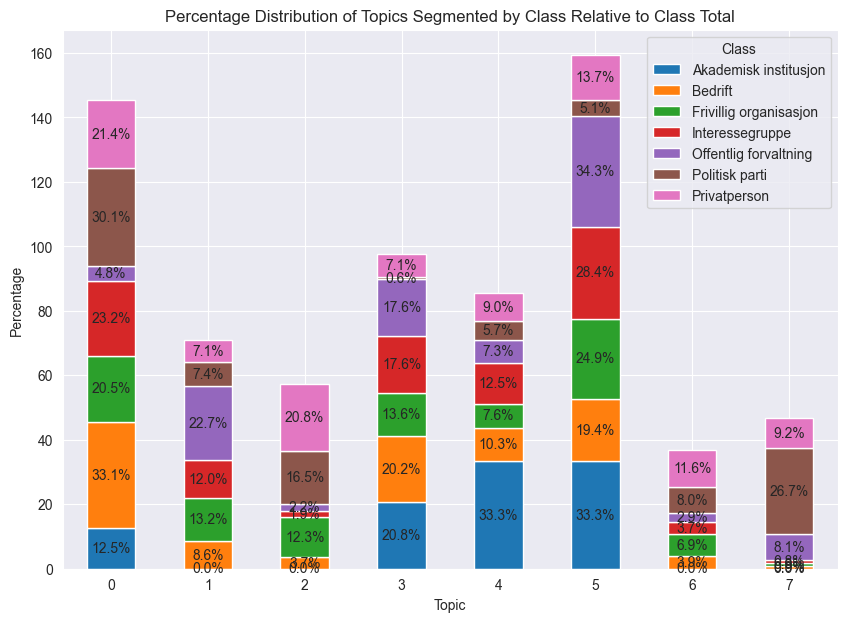

In [20]:
plot_topic_distribution(dataframe, savefig='LDA_Paragraph_distribution')

In [21]:
!python -m spacy validate

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.7.4) =================
ℹ spaCy installation:
/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/spacy

NAME              SPACY            VERSION                            
en_core_web_trf   >=3.7.2,<3.8.0   3.7.3   ✔
nb_core_news_sm   >=3.7.0,<3.8.0   3.7.0   ✔
nb_core_news_md   >=3.7.0,<3.8.0   3.7.0   ✔

